In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# Cofiguraciones
%matplotlib inline
plt.rcParams['figure.figsize'] = (10,10)

# Importación de datos

In [2]:
vehiculos = pd.read_csv("./Data/vehiculos_procesado_inicial.csv")
vehiculos.head()

,fabricante,modelo,year,desplazamiento,cilindros,transmision,traccion,clase,combustible,consumo,co2
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,17,522.764706
1,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,17,522.764706
2,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,13,683.615385
3,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,13,683.615385
4,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,16,555.437500


In [5]:
vehiculos.dtypes

fabricante         object
modelo             object
year                int64
desplazamiento    float64
cilindros         float64
transmision        object
traccion           object
clase              object
combustible        object
consumo             int64
co2               float64
dtype: object

In [4]:
vehiculos.shape

(38436, 11)

# Duplicados

- A/ Asegurarse de que los registros/datos que no deberian estar duplicados no lo están
- B/ Revisar si hay columnas que tienen un alto número de duplicados, ya que pueden no aportar mucha información

## A/

Asegurarse de que los registros/datos que no deberian estar duplicados no lo están

A priori lo único que no se tendría que repetir es el conjunto de fabricante + modelo + año. Por ello, vamos a comprobar si son únicos el conjunto de dichos campos

In [16]:
#vehiculos["modelo_unico"] = vehiculos["fabricante"] + "-" + vehiculos["modelo"] + "-" + str(vehiculos["year"])

# Mejor hacerlo de esta forma, ya que eliminia los espacios en blanco y saltos de línea
vehiculos["modelo_unico"] = vehiculos.fabricante.str.cat([vehiculos.modelo, vehiculos.year.apply(str)], sep="-")
vehiculos["modelo_unico"].value_counts()

Jeep-Cherokee/Wagoneer-1985              24
Chevrolet-C10 Pickup 2WD-1984            19
Ford-F150 Pickup 2WD-1984                19
GMC-C15 Pickup 2WD-1984                  19
GMC-S15 Pickup 2WD-1984                  18
                                         ..
Infiniti-Q45 Sport-2006                   1
Land Rover-Discovery Sport-2016           1
Chevrolet-City Express Cargo Van-2017     1
GMC-Safari AWD (cargo)-2003               1
Audi-A8 L-2011                            1
Name: modelo_unico, Length: 17448, dtype: int64

Como podemos observar hay muchos duplicados, lo que a priori no tenía que pasar, por lo que vamos a ver que está sucediendo. Para ello buscamos lo que sucede con un modelo en concreto.

In [17]:
vehiculos[vehiculos.modelo_unico == "Jeep-Cherokee/Wagoneer-1985"].head()

,fabricante,modelo,year,desplazamiento,cilindros,transmision,traccion,clase,combustible,consumo,co2,modelo_unico
20924,Jeep,Cherokee/Wagoneer,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19,467.736842,Jeep-Cherokee/Wagoneer-1985
20925,Jeep,Cherokee/Wagoneer,1985,2.5,4.0,Manual 4-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,22,403.954545,Jeep-Cherokee/Wagoneer-1985
20926,Jeep,Cherokee/Wagoneer,1985,2.5,4.0,Manual 4-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19,467.736842,Jeep-Cherokee/Wagoneer-1985
20927,Jeep,Cherokee/Wagoneer,1985,2.5,4.0,Manual 5-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20,444.350000,Jeep-Cherokee/Wagoneer-1985
20928,Jeep,Cherokee/Wagoneer,1985,2.8,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,15,592.466667,Jeep-Cherokee/Wagoneer-1985


En un principio el fabricante + modelo + año tendría que ser únicos, pero al hacer el estudio del caso "Jeep-Cherokee/Wagoneer-1985", vemos que aunque tenga el mismo valor para dichos campos otros pueden ser diferentes, por lo que no es correcto pensar que el fabricante + modelo + año tengan que ser únicos

Por lo tanto, solo vamos a tener en cuenta los registros que son complemante iguales, es decir, que todos los campos son los mismos

In [19]:
vehiculos.shape

(38436, 12)

In [20]:
vehiculos = vehiculos.drop_duplicates()
vehiculos.shape

(36930, 12)

In [22]:
del vehiculos["modelo_unico"]

## B/

Revisar si hay columnas que tienen un alto número de duplicados, ya que pueden no aportar mucha información. Los valores que se calculan nos permite saber si hay muchos duplicados, pero puede que esos duplicados estén bien como por ejemplo el combustible, el 65% de sus datos son iguales.

Que los campos tracción, transimisón, cilindro y combustible tengan un problema de valores repetidos, no es algo drámatico, y puede llegar a no ser un problema. Si alguno de estos campos tuviera un 90% de datos repetidos o más, sí que sería un problema, ya que nos indicaría que esos campos no merecen mucho estudio si la gran mayoría de veces son siempre el mismo valor.

In [41]:
def valores_duplicados_col(df):
    nRecords = len(df)

    for col in df:
        numeroPorValor = vehiculos[col].value_counts()
        masComun = numeroPorValor.iloc[0]
        menosComun = numeroPorValor.iloc[-1]

        print("{} | {}-{} | {}-{} | {}".format(
            df[col].name,
            round(masComun / (1.0 * nRecords), 3),
            round(menosComun / (1.0 * nRecords), 3),
            round((masComun / (1.0 * nRecords)) * 100, 3),
            round((menosComun / (1.0 * nRecords)) * 100, 3),
            df[col].dtype
            )
        )
        
valores_duplicados_col(vehiculos)

fabricante | 0.1-0.0 | 9.962-0.003 | object
modelo | 0.005-0.0 | 0.536-0.003 | object
year | 0.038-0.007 | 3.769-0.734 | int64
desplazamiento | 0.095-0.0 | 9.542-0.003 | float64
cilindros | 0.38-0.0 | 37.972-0.022 | float64
transmision | 0.287-0.0 | 28.67-0.003 | object
traccion | 0.353-0.005 | 35.25-0.479 | object
clase | 0.145-0.0 | 14.49-0.003 | object
combustible | 0.652-0.0 | 65.199-0.005 | object
consumo | 0.097-0.0 | 9.71-0.003 | int64
co2 | 0.084-0.0 | 8.405-0.003 | float64


# Valores inexistentes

Hay que estudiar los campos que no poseen datos, si hay un alto porcentaje de los registros que tienen ese campos vacíos o no. Si el porcentaje es pequeño se puede despreciar, pero de lo contrario hay que estudiar si esos campos son necesarios o no, si sí que lo son entonces hay que rellenar esos campos, con una nueva clase, o con el valor más frecuente, o usar un modelo predictivo para que calcule dichos valores...

In [44]:
def valores_inexistentes_col(df):
    nRecords = len(df)
    
    for col in df:
        nDatosInexistentes = df[col].isna().sum()
        print("{} | {} | {} | {}".format(
            df[col].name,
            nDatosInexistentes / nRecords,
            (nDatosInexistentes / nRecords) * 100,
            df[col].dtype
        ))
valores_inexistentes_col(vehiculos)

fabricante | 0.0 | 0.0 | object
modelo | 0.0 | 0.0 | object
year | 0.0 | 0.0 | int64
desplazamiento | 0.0037909558624424585 | 0.37909558624424583 | float64
cilindros | 0.003845112374763065 | 0.3845112374763065 | float64
transmision | 0.00029786081776333605 | 0.029786081776333604 | object
traccion | 0.02158137015976171 | 2.158137015976171 | object
clase | 0.0 | 0.0 | object
combustible | 0.0 | 0.0 | object
consumo | 0.0 | 0.0 | int64
co2 | 0.0 | 0.0 | float64


Vemos que campo traccion, cilindros y transmision tienen valores inexistentes. Sin embargo son cantidades despreciables (maximo es la variable traccion con un 2% inexistente)

# Valores extremos (outliers)

Para estudiar los valores extremos una medida que podemos usar es calcular los outliers con una puntación Z-Score mayor que 3, esto lo que significa es que se alejan 3 veces o más de la desviacón estándar de la media. Lógicamente solo se puede calcular el Z-Score en aquellas variables cuantiativas.


El Z-Score se mide como: $$z = \frac{x - \mu}{\sigma}$$  
donde: 
$$x = valor$$
$$\mu = media$$
$$\sigma = desviación$$


In [57]:
def outliers_col(df):
    for col in df:
        if df[col].dtype != np.object:
            nOutliers = np.sum(np.absolute(stats.zscore(vehiculos[col])) > 3)
            print("{} | {} | {}".format(
                col,
                nOutliers,
                df[col].dtype
            ))

outliers_col(vehiculos)

year | 0 | int64
desplazamiento | 0 | float64
cilindros | 0 | float64
consumo | 233 | int64
co2 | 358 | float64


<ipython-input-57-18c373575a64>:4: RuntimeWarning: invalid value encountered in greater
  nOutliers = np.sum(np.absolute(stats.zscore(vehiculos[col])) > 3)


Los únicos campos que tienen outliers son consumo y co2, éstos son los que vamos a estudiar acontinuación. Por otro lado, cuando se realiza el procesado hay que reducir los outliers que no tienen sentido, no hace falta que haya 0 outliers, redunciendolos vamos a mejorar en los modelos predictivos de machine learning/deep learning.

**La mejor forma de ver los outliers de un campo es usando un gráfico boxplot**

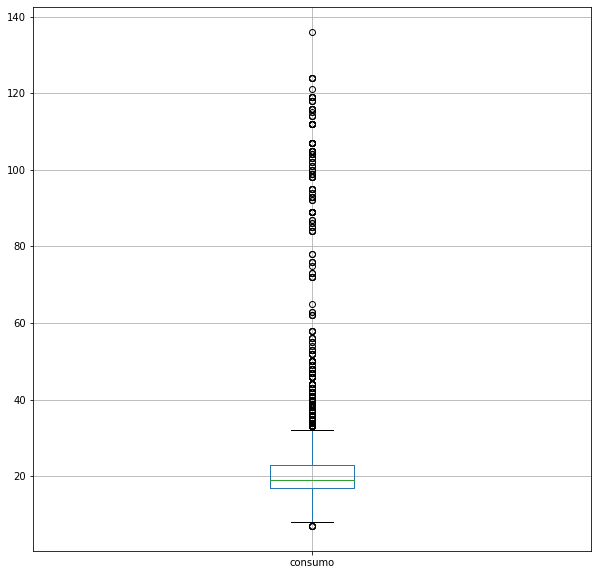

In [58]:
vehiculos.boxplot(column="consumo")

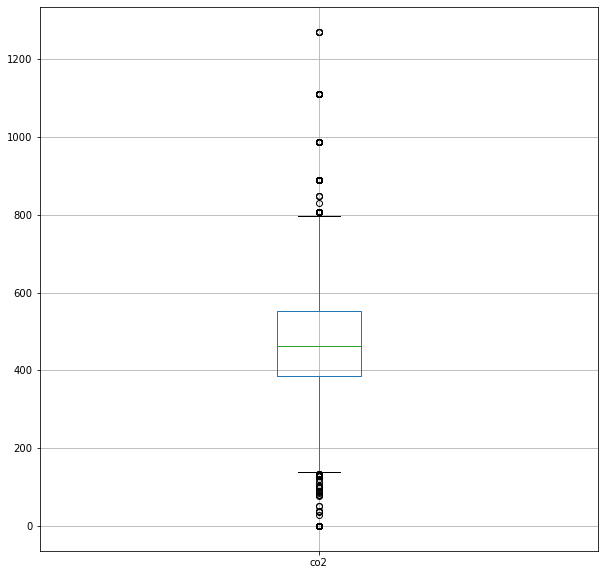

In [60]:
vehiculos.boxplot(column="co2")

Como podemos ver en los graficos anteriores hay algunos coches que consumen más de lo normal, otros que consumen menos o incluso nada. Esto se debe a que en el dataset no hay solo vehículos de gasolina, también hay híbridos y eléctricos.  
  
  Como el objetivo es estudiar el consumo, vamos a eliminar los coches eléctricos.

In [62]:
vehiculos[vehiculos.co2 == 0].combustible.unique()

array(['Electricity'], dtype=object)

In [70]:
vehiculos_no_electricos = vehiculos[vehiculos.co2 > 0]
vehiculos_no_electricos.head()

,fabricante,modelo,year,desplazamiento,cilindros,transmision,traccion,clase,combustible,consumo,co2
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,17,522.764706
2,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,13,683.615385
4,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,16,555.437500
5,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,13,683.615385
6,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,16,555.437500


**Volvemos a ejecutar todo de nuevo para este nuevo dataset, no sea que haya cambios.**

In [71]:
outliers_col(vehiculos_no_electricos)

year | 0 | int64
desplazamiento | 0 | float64
cilindros | 0 | float64
consumo | 233 | int64
co2 | 358 | float64


<ipython-input-57-18c373575a64>:4: RuntimeWarning: invalid value encountered in greater
  nOutliers = np.sum(np.absolute(stats.zscore(vehiculos[col])) > 3)


In [72]:
valores_duplicados_col(vehiculos_no_electricos)

fabricante | 0.1-0.0 | 10.0-0.003 | object
modelo | 0.005-0.0 | 0.538-0.003 | object
year | 0.038-0.007 | 3.784-0.737 | int64
desplazamiento | 0.096-0.0 | 9.578-0.003 | float64
cilindros | 0.381-0.0 | 38.115-0.022 | float64
transmision | 0.288-0.0 | 28.779-0.003 | object
traccion | 0.354-0.005 | 35.384-0.481 | object
clase | 0.145-0.0 | 14.544-0.003 | object
combustible | 0.654-0.0 | 65.445-0.005 | object
consumo | 0.097-0.0 | 9.747-0.003 | int64
co2 | 0.084-0.0 | 8.437-0.003 | float64


In [73]:
valores_inexistentes_col(vehiculos_no_electricos)

fabricante | 0.0 | 0.0 | object
modelo | 0.0 | 0.0 | object
year | 0.0 | 0.0 | int64
desplazamiento | 5.43611209263135e-05 | 0.00543611209263135 | float64
cilindros | 8.154168138947025e-05 | 0.008154168138947026 | float64
transmision | 5.43611209263135e-05 | 0.00543611209263135 | object
traccion | 0.021445462205430674 | 2.1445462205430674 | object
clase | 0.0 | 0.0 | object
combustible | 0.0 | 0.0 | object
consumo | 0.0 | 0.0 | int64
co2 | 0.0 | 0.0 | float64


Ahora vemos que no hay valores inexistentes extremos en ninguna variable. La variable con mayor numero de valores inexistentes es traccion (2%). Obviamente, los coches electricos no tienen motor de gasolina y por tanto, no tienen cilindros

# Conclusiones
- Hay 1506 records duplicados (los hemos eliminado).
- Las variables desplazamiento, cilindros, transmisión y tracción tienen valores inexistentes.
- La variable combustible tiene una clase dominante (65% de coches tienen combustible Regular).
- Hay un outlier en las variables co2 y consumo.
- Hay coches híbridos y coches electricos (hemos eliminado estos ultimos ya que no contaminan).

# Exportamos

In [75]:
vehiculos_no_electricos.to_csv("./data/vehiculos_limpio_analisis.csv", index=False)